In [2]:

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from adtk.data import validate_series
from adtk.visualization import plot
from adtk.detector import ThresholdAD
from adtk.detector import OutlierDetector

from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import variation
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import itertools

from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('cardox.csv')
df.index = pd.to_datetime(df.date, format='%Y-%m-%d')
df.drop('date', axis=1, inplace=True)

In [5]:
df.shape

(729, 1)

In [6]:
df

,value
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
...,...
2018-07-01,408.71
2018-08-01,406.99
2018-09-01,405.51


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


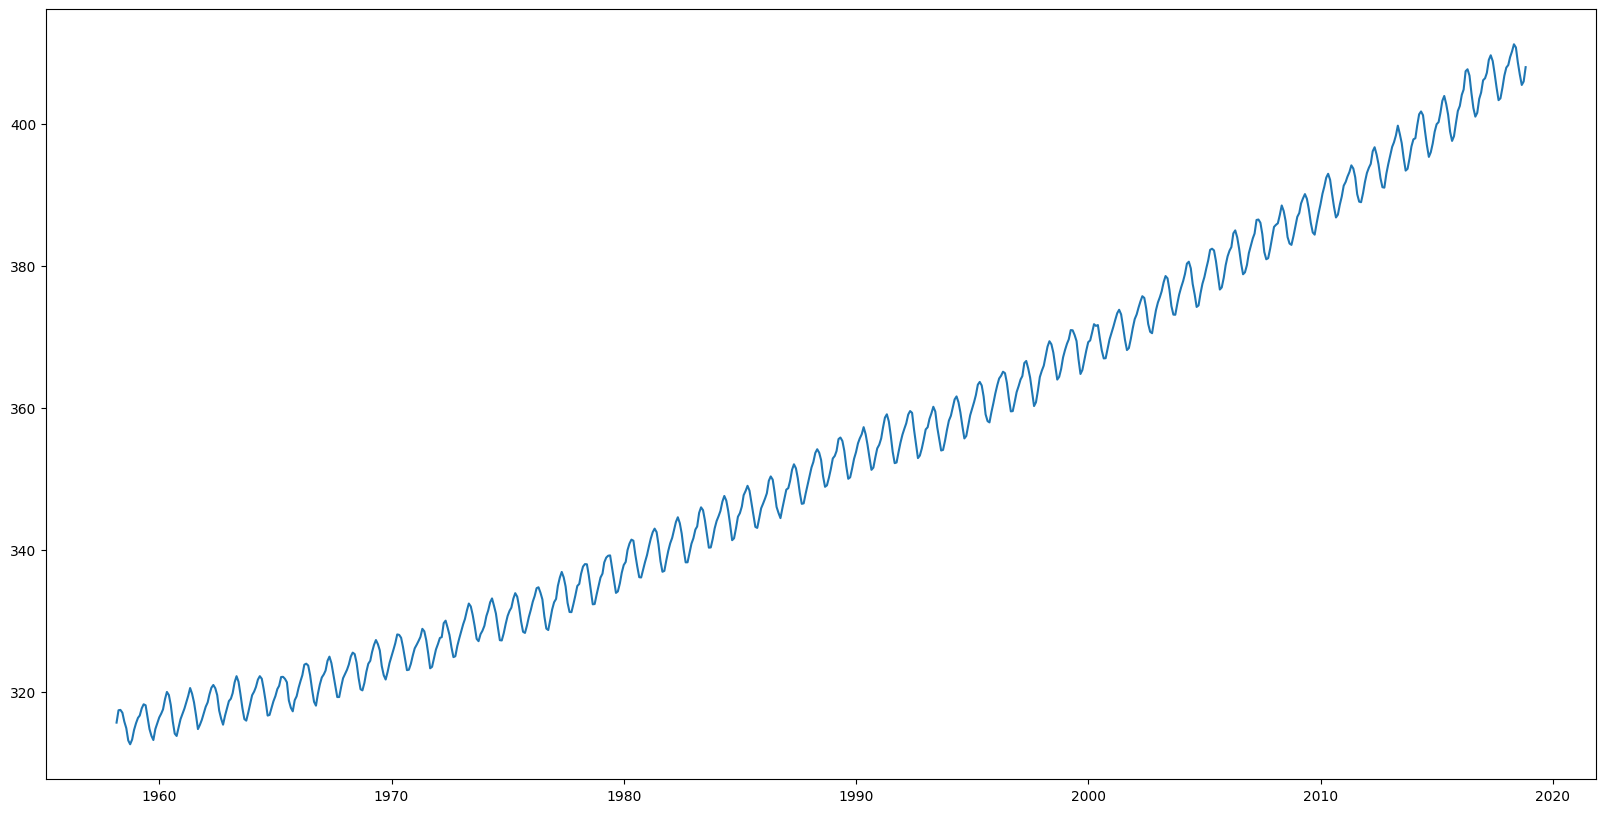

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(df)

Text(0.5, 0.98, 'Мультиплікатива модель')

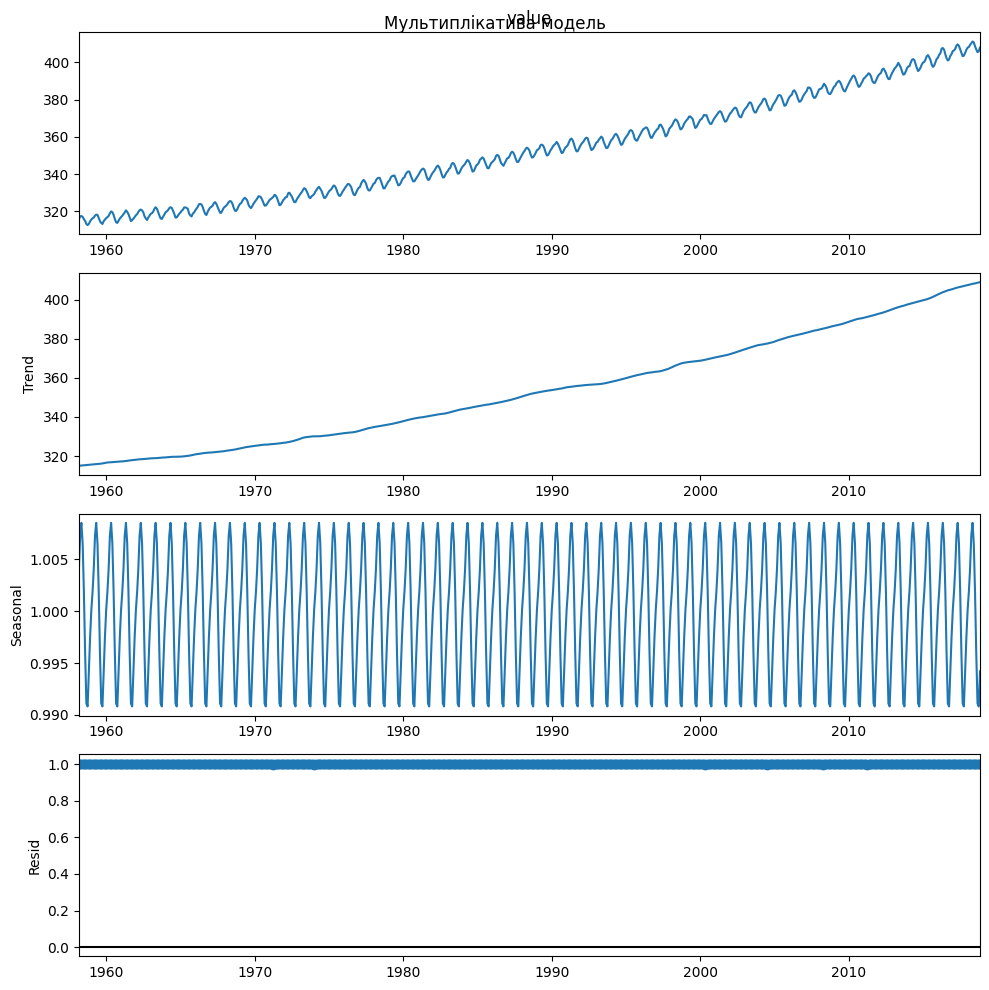

In [9]:
# Декомпозиція 
result_M = seasonal_decompose(df.value, model='multiplicative', extrapolate_trend=12)

# Побудова графіку
plt.rcParams.update({'figure.figsize': (10,10)})
result_M.plot().suptitle('Мультиплікатива модель')

In [10]:
result = sm.tsa.stattools.adfuller(df, autolag='AIC')
print(f'ADF-statistics: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical values:')
    print(f'{key}, {value}')

ADF-statistics: 4.994847244403937
p-value: 1.0
Critical values:
1%, -3.439620010600208
Critical values:
5%, -2.8656309041017756
Critical values:
10%, -2.5689484851894413


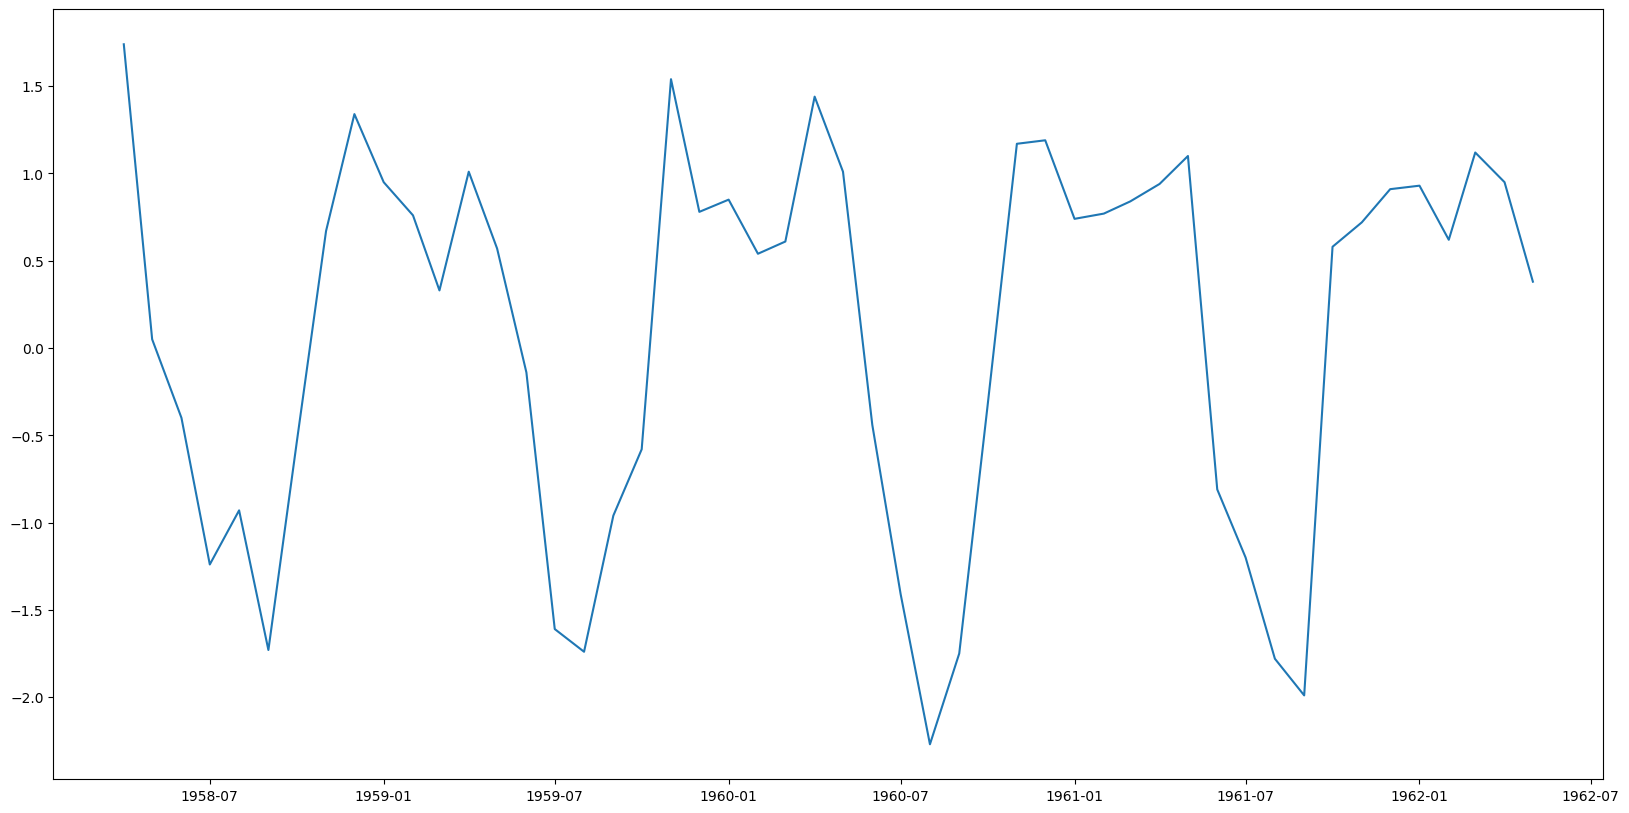

In [11]:
detrended = df.diff()[1:]
plt.figure(figsize=(20, 10))
plt.plot(detrended[0:50])

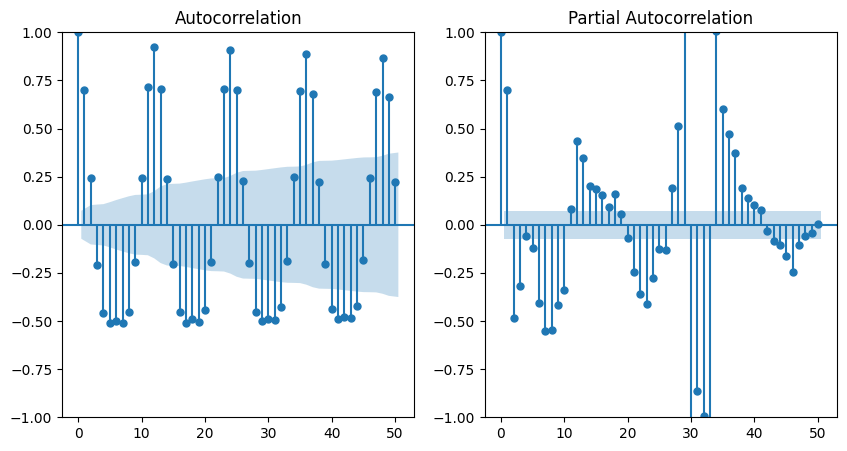

In [12]:
fig, axes = plt.subplots(1, 2,figsize=(10, 5), dpi= 100)
plot_acf(detrended, lags=50, ax=axes[0])
plot_pacf(detrended, lags=50, ax=axes[1])
plt.show()

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = ARIMA(df,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))           
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6896.026330835491
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5868.510106587337
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2822.10872847603
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2377.959623194367
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1558.6042050376373
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1277.6432988214592
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1864.338786334426
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1357.4062887616135
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5896.067901403148
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4893.823593202285
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2101.3642145233666
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1884.326154087601
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1017.6378224741707
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1082.1574123486266
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1582.5491836332171
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1055.3559079354181
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2371.0019758047247
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1756.5111480115302
A

In [14]:
mod = ARIMA(df, 
            order=(1, 1, 1), 
            seasonal_order=(1, 1, 1, 12), 
            enforce_stationarity=False, 
            enforce_invertibility=False) 
results = mod.fit()

In [15]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.1706,0.084,2.038,0.042,0.006,0.335
ma.L1,-0.5360,0.073,-7.306,0.000,-0.680,-0.392
ar.S.L12,-0.0005,0.000,-1.624,0.104,-0.001,9.83e-05
ma.S.L12,-0.8671,0.021,-41.951,0.000,-0.908,-0.827
sigma2,0.0941,0.005,20.328,0.000,0.085,0.103


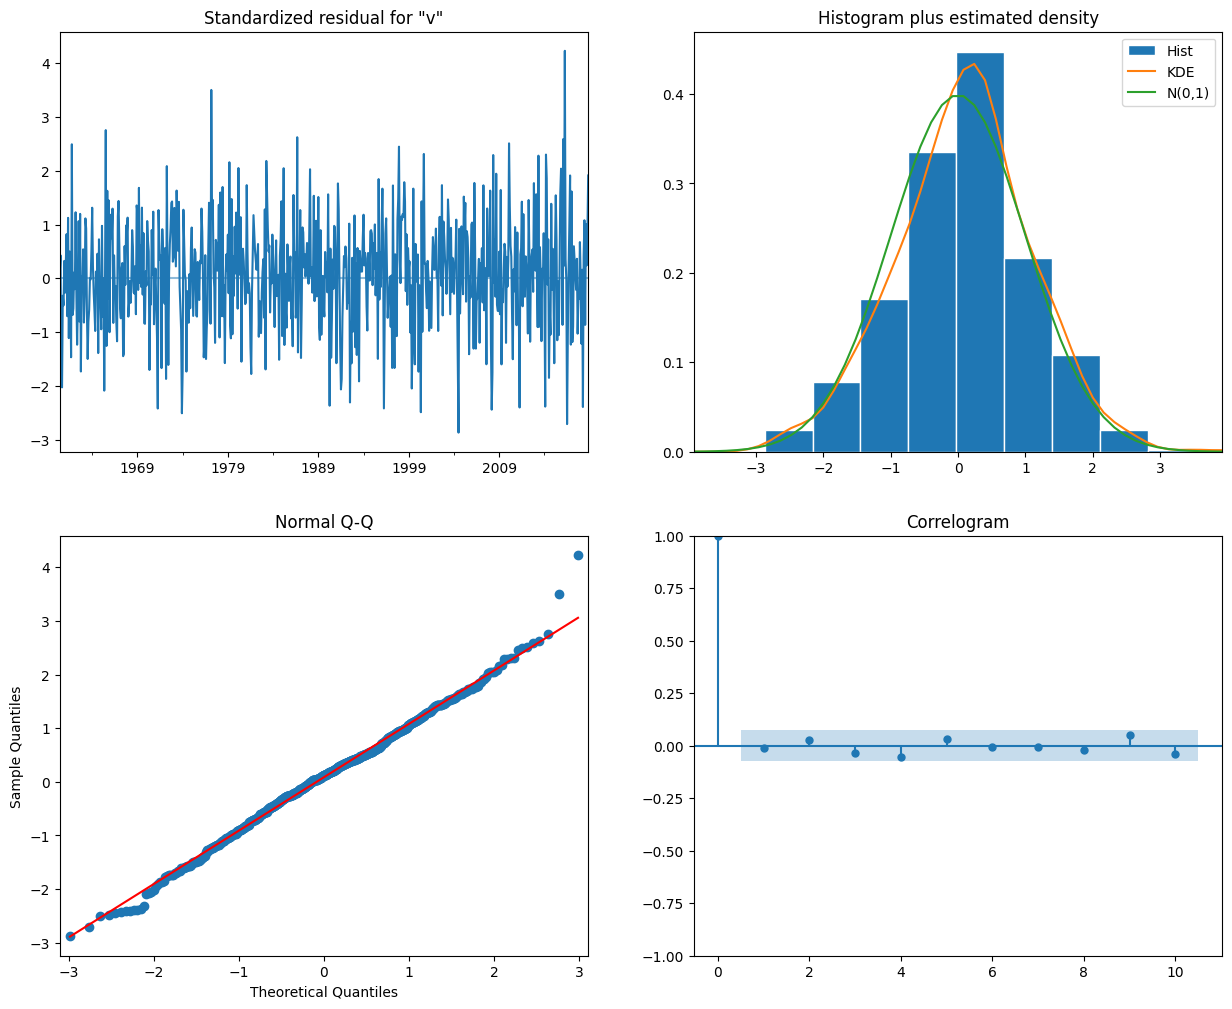

In [16]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2014-08-01'), dynamic=False)
pred_ci = pred.conf_int()

Text(0, 0.5, 'Sales')

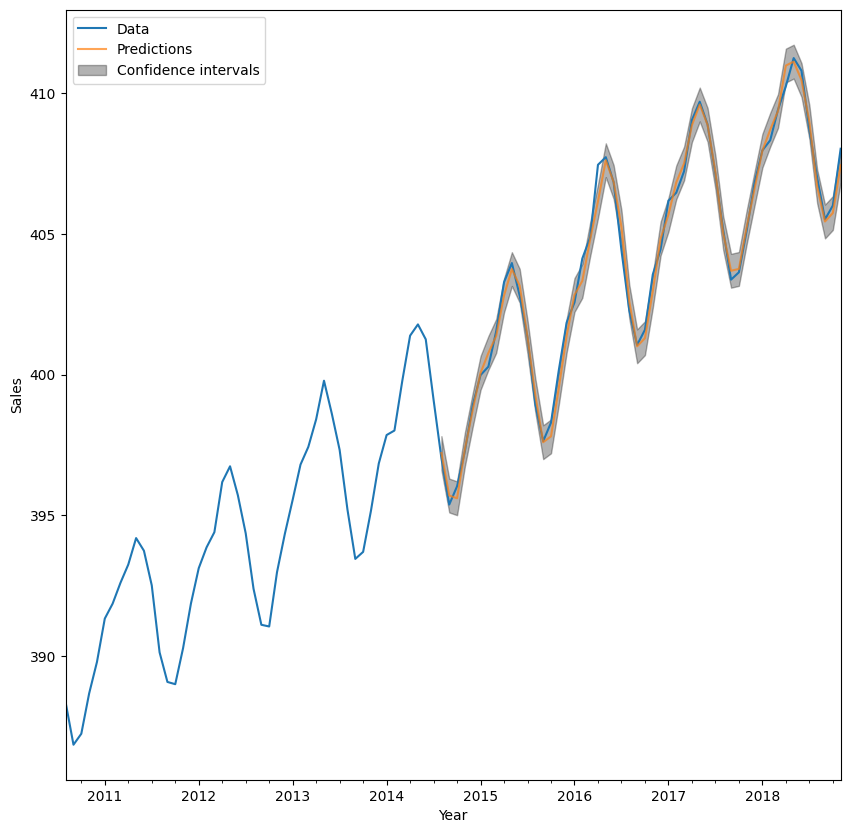

In [18]:
ax = df[len(df)-100:].plot()
pred.predicted_mean.plot(alpha=.7)
ax.fill_between(pred_ci.index, pred_ci['lower value'], pred_ci['upper value'], alpha=.3, color='k')

plt.legend(('Data', 'Predictions', 'Confidence intervals'))
ax.set_xlabel('Year')
ax.set_ylabel('Sales')

In [19]:
pred_dynamic = results.get_prediction(pd.to_datetime('2014-08-01'), dynamic=True)
pred_ci = pred.conf_int()

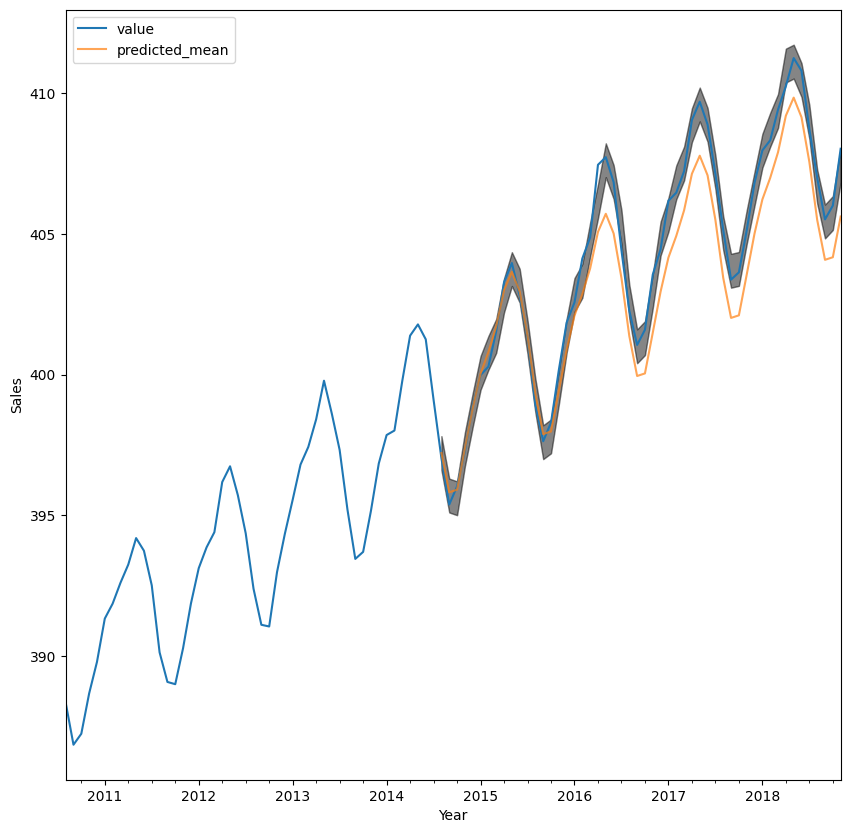

In [20]:
ax = df[len(df)-100:].plot()
pred_dynamic.predicted_mean.plot(alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_between(pred_ci.index, pred_ci['lower value'], pred_ci['upper value'], alpha=.3, color='k')
ax.set_xlabel('Year')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [21]:
df_forecasted = pred.predicted_mean
df_truth = df.value['1958-03-01':] # Обчислюємо середню квадртичну похибку
mse = ((df_forecasted - df_truth) ** 2).mean()
print('Mean squared error of predictions = {}'.format(round(mse, 2)))

Mean squared error of predictions = 0.15


In [22]:
pred_uc = results.get_forecast(steps=30)
# Отримуємо інтервал прогнозу
pred_ci = pred_uc.conf_int()

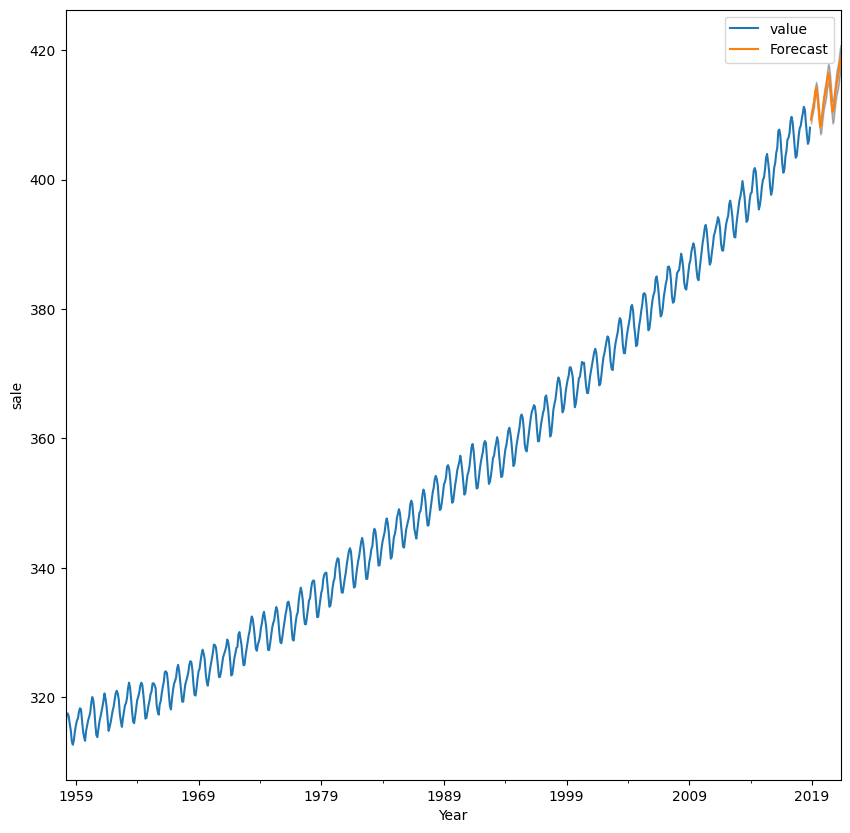

In [23]:
ax = df.plot(label='Known')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('sale')
plt.legend()
plt.show()

In [ ]:
pred_ci.to_csv('prediction_results.csv')